## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

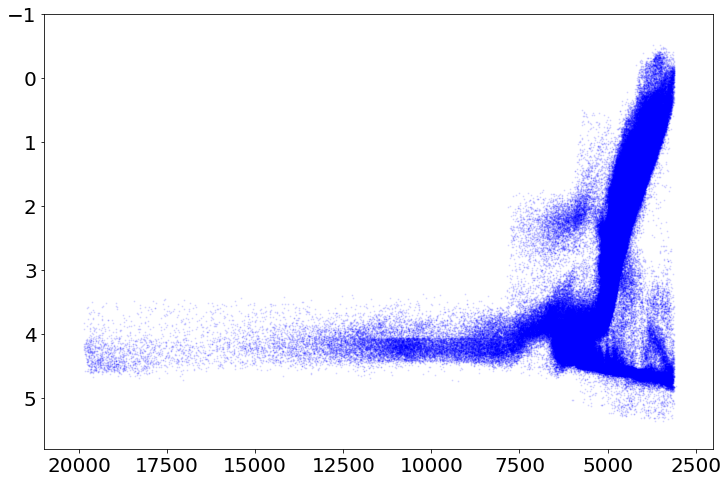

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.030, 0.019
POLY2: 0.006, 0.037, 0.019
SIGMOID: -0.875, -24.246, -0.071, 0.015


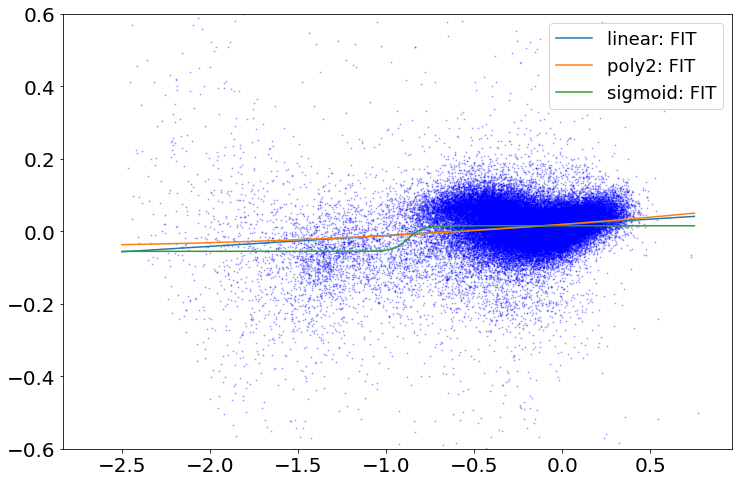

In [4]:
star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['NI_FE'])]
star = star[~np.isnan(star['FE_H_ERR'])]
star = star[~np.isnan(star['NI_FE_ERR'])]


ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((60 < star['GLAT'])) 
cut1 = np.where(ct1)[0]


slope, intercept = mcFit2(linear, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                          star['NI_FE_ERR'][cut1], p0=[.04,.032])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

polyA, polyB, polyC,  = mcFit3(poly2, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                         star['NI_FE_ERR'][cut1],p0=[-.056,-.030,.025])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

cfA, cfB, cfC, cfD = mcFit4(sigmoid, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                            star['NI_FE_ERR'][cut1],p0=[-.9,-19,-.1,.028])
print(f'SIGMOID: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.scatter(star['FE_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.25)
ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H_ERR'][cut1]),
             yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0, alpha=.001)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_ylim(-.6,.6)

x_plot = np.linspace(-2.5,.75,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,sigmoid(x_plot, cfA, cfB, cfC, cfD), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.000, 1.634
POLY2: 0.000, -0.001, 2.665


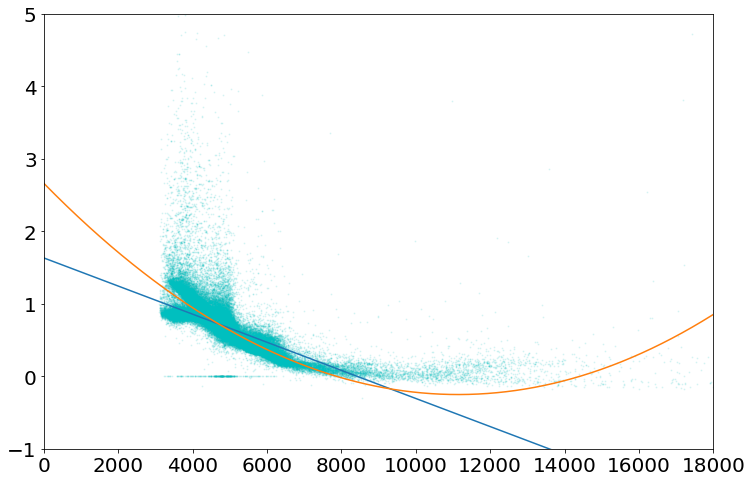

In [5]:
star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['J'])]
star = star[~np.isnan(star['K'])]
star = star[~np.isnan(star['J_ERR'])]
star = star[~np.isnan(star['K_ERR'])]


ct2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10) 
cut2 = np.where(ct2)[0]
use_stars = star[cut2]

slope2, intercept2 = mcFit2(linear, star['TEFF'][cut2],(star['J'][cut2]-star['K'][cut2]), star['TEFF_ERR'][cut2], \
                          (np.sqrt(use_stars['J_ERR']**2)+(use_stars['K_ERR']**2)), p0=[-.001,2])
print(f'LINEAR: {slope2:.3f}, {intercept2:.3f}')

polyA2, polyB2, polyC2,  = mcFit3(poly2, star['TEFF'][cut2],(star['J'][cut2]-star['K'][cut2]), star['TEFF_ERR'][cut2], \
                         (np.sqrt(use_stars['J_ERR']**2)+(use_stars['K_ERR']**2)),p0=[.001,-.030,.1])
print(f'POLY2: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')




fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
ax2.set_ylim(-1,5)
ax2.set_xlim(0,18000)
ax2.scatter(star['TEFF'][cut2],(star['J'][cut2]-star['K'][cut2]),s=1,c='c',alpha=0.1)
ax2.errorbar((star['TEFF'][cut2]),(star['J'][cut2]-star['K'][cut2]), xerr=(star['TEFF_ERR'][cut2]), 
             yerr=(np.sqrt(use_stars['J_ERR']**2)+(use_stars['K_ERR']**2)), 
             ecolor='grey',fmt='none', capsize=5, zorder=0, alpha=.001)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(0,18000,1000) # X-PLOTING FOR FITS

ax2.plot(x_plot,linear(x_plot, slope2, intercept2), label='linear: FIT')

ax2.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2, ), label='poly2: FIT')


#I played around with the logfit parameters for a couple hours and I couldn't get it to work,
#the coefficients seem to be really finicky, so everytime I just got a runtime error



## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.002, -4.145
POLY3: -0.000, 0.015, -1.883, 31.912
COSFIT: 50.918, 0.023, 0.805, 0.713


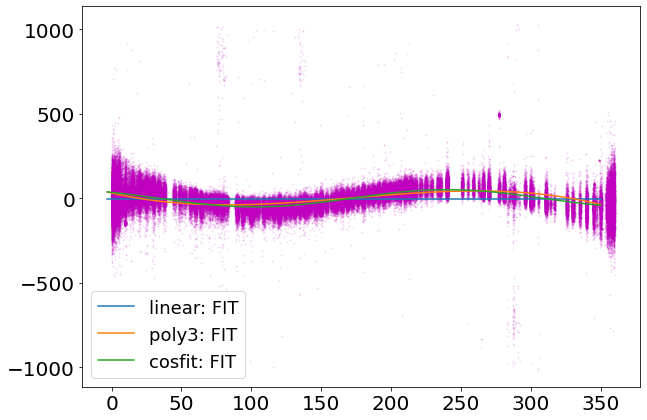

In [7]:

badbits = 2**23
suspectbits = 2**16

star = star[~np.isnan(star['GLON'])]
star = star[~np.isnan(star['VHELIO_AVG'])]
star = star[~np.isnan(star['VERR'])]

ct3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((-10<star['GLAT']) & (10>star['GLAT']))
cut3 = np.where(ct3)[0]



slope3, intercept3 = mcFit2(linear, star['GLON'][cut3], star['VHELIO_AVG'][cut3], star['GLON'][cut3]/1000, \
                         star['VERR'][cut3]/1000, p0=[0.002,-4.145])
print(f'LINEAR: {slope3:.3f}, {intercept3:.3f}')


polyA3, polyB3, polyC3, polyD3,  = mcFit4(poly3, star['GLON'][cut3], star['VHELIO_AVG'][cut3], star['GLON'][cut3]/1000, \
                         star['VERR'][cut3]/1000,p0=[-.000,.015,-1.883,31.912])
print(f'POLY3: {polyA3:.3f}, {polyB3:.3f}, {polyC3:.3f}, {polyD3:.3f}')


cfA3, cfB3, cfC3, cfD3 = mcFit4(cosfit, star['GLON'][cut3], star['VHELIO_AVG'][cut3], star['GLON'][cut3]/1000, \
                            0.000001,p0=[50.918,.023,.805,.713])
print(f'COSFIT: {cfA3:.3f}, {cfB3:.3f}, {cfC3:.3f}, {cfD3:.3f}')



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_ylim(-450,450)


ax1.scatter(star['GLON'][cut3],star['VHELIO_AVG'][cut3],s=1,c='m',alpha=0.1)




x_plot = np.linspace(-3,350,1000)

ax1.plot(x_plot,linear(x_plot, slope3, intercept3), label='linear: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA3, polyB3, polyC3,polyD3 ), label='poly3: FIT')

ax1.plot(x_plot,cosfit(x_plot, cfA3, cfB3, cfC3, cfD3), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.109, 0.430
POLY3: 0.000, -0.019, 0.384, -0.140


C:\Users\caden\AppData\Local\Temp\ipykernel_19860\3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


LOGFIT: 0.448, 0.154, -0.116, 1.477


C:\Users\caden\AppData\Local\Temp\ipykernel_19860\3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


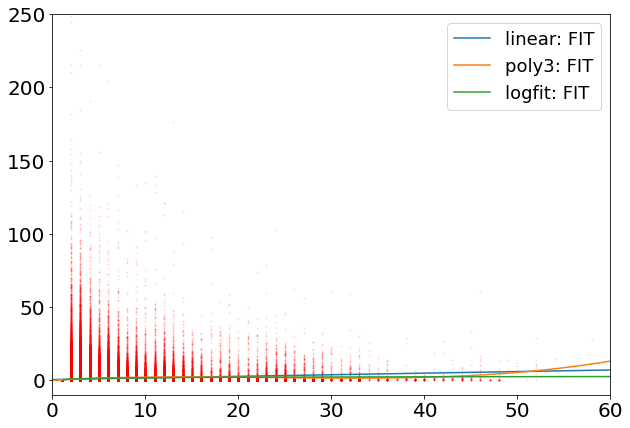

In [30]:
badbits = 2**23   
suspectbits = 2**16 

star = star[~np.isnan(star['NVISTIS'])]
star = star[~np.isnan(star['VSCATTER'])]
star = star[~np.isnan(star['VERR'])]


ct4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NVISTIS'] >= 1) 
cut4 = np.where(ct4)[0]



slope, intercept = mcFit2(linear, star['NVISTIS'][cut4], star['VSCATTER'][cut4],star['NVISTIS'][cut4]/1000, \
                          star['VERR'][cut4]/1000, p0=[.108,.448])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')


polyA4, polyB4, polyC4, polyD4  = mcFit4(poly3, star['NVISTIS'][cut4], star['VSCATTER'][cut4], star['NVISTIS'][cut4]/1000, \
                         star['VERR'][cut4]/1000,p0=[.000,-.02,.385,-.128])
print(f'POLY3: {polyA4:.3f}, {polyB4:.3f}, {polyC4:.3f}, {polyD4:.3f}')


cfA, cfB, cfC, cfD = mcFit4(logfit, star['NVISTIS'][cut4], star['VSCATTER'][cut4], star['NVISTIS'][cut4]/1000,\
                            star['VERR'][cut4]/1000,p0=[.423,.079,-.063, 1])
print(f'LOGFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_xlim(0,60)
ax1.set_ylim(-10,250)

ax1.scatter(star['NVISTIS'][cut4],(star['VSCATTER'])[cut4],s=1,c='r',alpha=0.1)




x_plot = np.linspace(0,60,100)

ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA4, polyB4, polyC4, polyD4), label='poly3: FIT')

ax1.plot(x_plot,logfit(x_plot, cfA, cfB, cfC, cfD), label='logfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.019, 0.569
POLY2: 0.001, -0.275, 16.740
POLY3: 0.000, -0.000, -0.168, 13.052


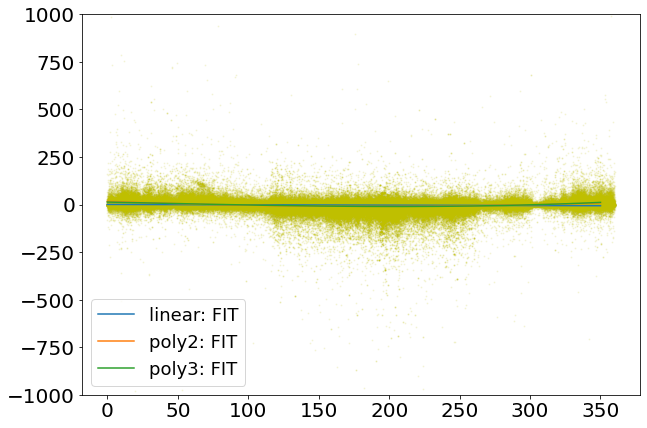

In [31]:

badbits = 2**23 
suspectbits = 2**16 

star = star[~np.isnan(star['RA'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERROR'])]


ct5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
      
cut5 = np.where(ct5)[0]


slope, intercept = mcFit2(linear, star['RA'][cut5], (star['GAIA_PMRA'])[cut5], star['RA'][cut5]/1000, \
                          star['GAIA_PMRA_ERROR'][cut5]/1000, p0=[-.019,.569])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')


polyA, polyB, polyC  = mcFit3(poly2, star['RA'][cut5], (star['GAIA_PMRA'])[cut5], star['RA'][cut5]/1000, \
                         star['GAIA_PMRA_ERROR'][cut5]/1000,p0=[.001,-.275,16.74])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')


cfA, cfB, cfC, cfD = mcFit4(poly3, star['RA'][cut5], (star['GAIA_PMRA'])[cut5], star['RA'][cut5]/1000,\
                            star['GAIA_PMRA_ERROR'][cut5]/1000,p0=[0,-0,-.168,13.052])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_ylim(-1000,1000)


ax1.scatter(star['RA'][cut5],(star['GAIA_PMRA'])[cut5],s=1,c='y',alpha=0.1)




x_plot = np.linspace(0,350,1000)

ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC ), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [18]:

badbits = 2**23
suspectbits = 2**16 

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['LOGG'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['LOGG_ERR'])]

ct6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['TEFF'] > 60000 & star['LOGG']<3) 
cut6 = np.where(ct6)[0]



slope1, intercept1 = mcFit2(linear, star['TEFF'][cut6], star['LOGG'][cut6], star['TEFF_ERR'][cut6]/1000, \
                          star['LOGG_ERR'][cut6]/1000, p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')


polyA1, polyB1, polyC1, polyD1 = mcFit4(poly2, star['TEFF'][cut6], star['LOGG'][cut6], star['TEFF_ERR'][cut6]/1000, \
                         star['LOGG_ERR'][cut6]/1000,p0=[600,1,1,1])

print(f'POLY2: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}')


cfA1, cfB1, cfC1, cfD1 = mcFit4(poly3, star['TEFF'][cut6], star['LOGG'][cut6], star['TEFF_ERR'][cut6]/1000, \
                            star['LOGG_ERR'][cut6]/1000,p0=[0,1,-1,0.5])
print(f'POLY3: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['TEFF'][cut6],star['LOGG'][cut6],s=1,c='g',alpha=0.1)




x_plot = np.linspace(-3,1.5,100)

ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA1, polyB1, polyC1 ), label='poly2: FIT')

ax1.plot(x_plot,sigmoid(x_plot, cfA1, cfB1, cfC1, cfD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.973, -0.996
POLY2: 0.002, -1.092, -0.799
POLY3: -0.000, 0.010, -1.252, -0.590


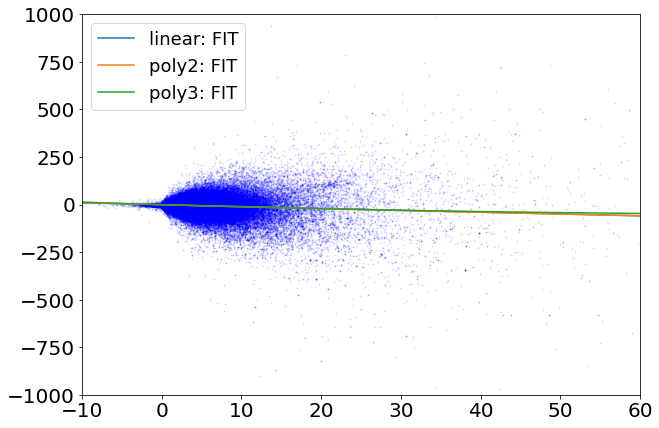

In [32]:

badbits = 2**23
suspectbits = 2**16

star = star[~np.isnan(star['GAIA_PARALLAX'])]
star = star[~np.isnan(star['GAIA_PARALLAX_ERROR'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERROR'])]

ct7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
      
cut7 = np.where(ct7)[0]



slope1, intercept1 = mcFit2(linear, star['GAIA_PARALLAX'][cut7], star['GAIA_PMRA'][cut7],  \
                          star['GAIA_PMRA_ERROR'][cut7]/1000, p0=[-.973,-.996])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')


polyA1, polyB1, polyC1,  = mcFit3(poly2, star['GAIA_PARALLAX'][cut7], star['GAIA_PMRA'][cut7], star['GAIA_PARALLAX_ERROR'][cut7]/1000,  \
                         star['GAIA_PMRA_ERROR'][cut7]/1000,p0=[.002,-1.092,-.799])

print(f'POLY2: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}')

cfA1, cfB1, cfC1, cfD1 = mcFit4(poly3, star['GAIA_PARALLAX'][cut7], star['GAIA_PMRA'][cut7], star['GAIA_PARALLAX_ERROR'][cut7]/1000, \
                            star['GAIA_PMRA_ERROR'][cut7]/1000,p0=[-0,.01,-1.252,-0.59])
print(f'POLY3: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_xlim(-10,60)
ax1.set_ylim(-1000,1000)


ax1.scatter(star['GAIA_PARALLAX'][cut7],star['GAIA_PMRA'][cut7],s=1,c='b',alpha=0.1)




x_plot = np.linspace(-10,100,1000)

ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')

ax1.plot(x_plot,poly2(x_plot, polyA1, polyB1, polyC1 ), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, cfA1, cfB1, cfC1, cfD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()